In [1]:
import warnings
warnings.filterwarnings("ignore")

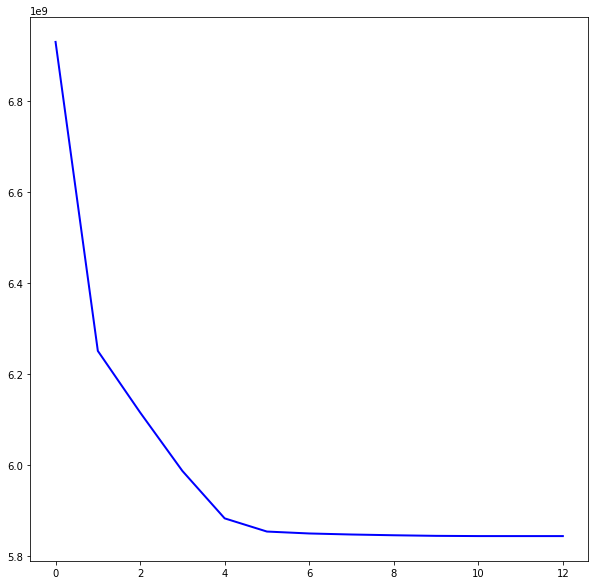

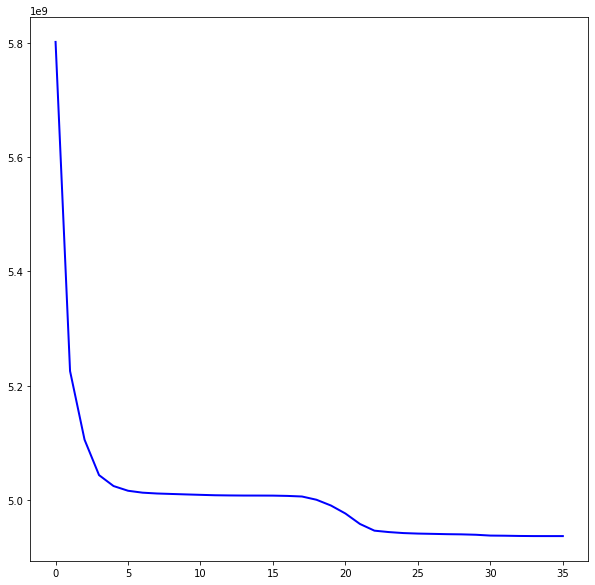

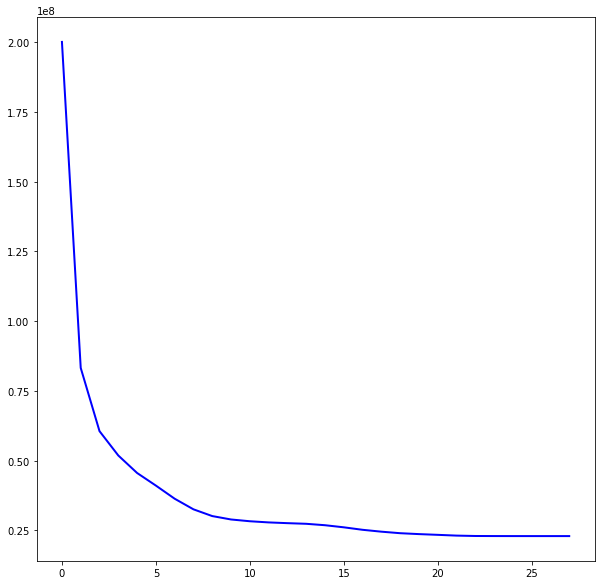

Using raw data converged in 13 iteration (371.41 seconds)
Classification accuracy: 0.91
#################
Project data into 73 dimensions with PCA converged in 36 iteration (116.78 seconds)
Classification accuracy: 0.93
#################
Project data into 1 dimension with PCA converged in 28 iteration (48.00 seconds)
Classification accuracy: 0.74


In [2]:
#import libraries
import numpy as np
from matplotlib import pyplot as plt
from Mykmeans import Kmeans
from MyPCA import PCA
import time

# read in data.
data=np.genfromtxt("Digits089.csv",delimiter=",")
Xtrain=data[data[:,0]!=5,2:]
ytrain=data[data[:,0]!=5,1]
Xtest=data[data[:,0]==5,2:]
ytest=data[data[:,0]==5,1]

# apply kmeans algorithms to raw data
clf = Kmeans(k=8)
start = time.time()
num_iter, error_history= clf.fit(Xtrain, ytrain)
time_raw = time.time() - start

# plot the history of reconstruction error
fig = plt.figure()
plt.plot(np.arange(len(error_history)),error_history,'b-',linewidth=2)
fig.set_size_inches(10, 10)
fig.savefig('raw_data.png')
plt.show()

# using kmeans clustering for classification
predicted_label = clf.predict(Xtest)
acc_raw = np.count_nonzero(predicted_label==ytest)/len(Xtest)

# apply kmeans algorithms to low-dimensional data (PCA) that captures >90% of variance
pca = PCA()
Xtrain_pca, num_dim = pca.fit(Xtrain)
clf = Kmeans(k=8)
start = time.time()
num_iter_pca, error_history_pca = clf.fit(Xtrain_pca, ytrain)
time_pca = time.time() - start

# plot the history of reconstruction error
fig1 = plt.figure()
plt.plot(np.arange(len(error_history_pca)),error_history_pca,'b-',linewidth=2)
fig1.set_size_inches(10, 10)
fig1.savefig('pca.png')
plt.show()

# using kmeans clustering for classification
Xtest_pca = pca.predict(Xtest)
predicted_label = clf.predict(Xtest_pca)
acc_pca = np.count_nonzero(predicted_label==ytest)/len(Xtest)

# apply kmeans algorithms to 1D feature obtained from PCA
pca = PCA(num_dim=1)
Xtrain_pca, _ = pca.fit(Xtrain)
clf = Kmeans(k=8)
start = time.time()
num_iter_pca_1, error_history_pca_1 = clf.fit(Xtrain_pca, ytrain)
time_pca_1 = time.time() - start

# plot the history of reconstruction error
fig2 = plt.figure()
plt.plot(np.arange(len(error_history_pca_1)),error_history_pca_1,'b-',linewidth=2)
fig2.set_size_inches(10, 10)
fig2.savefig('pca_1d.png')
plt.show()

# using kmeans clustering for classification
Xtest_pca = pca.predict(Xtest)
predicted_label = clf.predict(Xtest_pca)
acc_pca_1 = np.count_nonzero(predicted_label==ytest)/len(Xtest)

# print the average information entropy and number of iterations for convergence
print('Using raw data converged in %d iteration (%.2f seconds)' %(num_iter,time_raw))
print('Classification accuracy: %.2f' %acc_raw)

print('#################')
print('Project data into %d dimensions with PCA converged in %d iteration (%.2f seconds)'%(num_dim,num_iter_pca,time_pca))
print('Classification accuracy: %.2f' %acc_pca)

print('#################')
print('Project data into 1 dimension with PCA converged in %d iteration (%.2f seconds)'%(num_iter_pca_1,time_pca_1))
print('Classification accuracy: %.2f' %acc_pca_1)


#  a. 

-  the number of iterations for convergence :  Using raw data converged in 13 iteration

- the classification accuracy on the test samples : Classification accuracy: 0.91

- plot shape following what you expect?

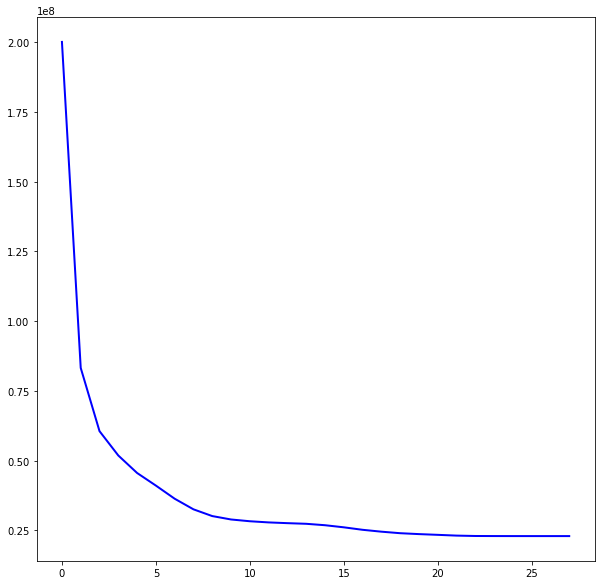

Yes. According to the plot, the convergence appears around 34.


In [3]:
fig2 = plt.figure()
plt.plot(np.arange(len(error_history_pca_1)),error_history_pca_1,'b-',linewidth=2)
fig2.set_size_inches(10, 10)
plt.show()

print('Yes. According to the plot, the convergence appears around 34.')

# b.

- How many dimensions are necessary in this case?  73 dimensions with PCA converged in 36 iteration.

- Does PCA help clustering? Explain. (Hint: Consider both the classification accuracy and the runtime of the algorithm.) Yes.
   it do dimensionality reduction and decrease the time for the model

# c.

- Are the results better? Explain.

  No,
  Project data into 1 dimension with PCA converged in 28 iteration (48.00 seconds) Classification accuracy: 0.74
  so the number of iteration is larger and the accuracy is less than the privous ones 
